# Research Question [RQs]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## 1. [RQ1] Exploratory Data Analysis (EDA)

The first thing we do is open and read our dataset, using pandas and the pd.read_json command

In [2]:
df_a= pd.read_json('lighter_authors.json', lines= True)

In the next few lines of code, we will try to get general insight about the dataset; in particular what we want to know is:
- All the features we have for each row, using the columns command.
- The number of rows and number of features each row has, using the shape command.
- Get a first sight of how the values are stored, using the head() or tail() command.
- Retrive information about the type of values each feature is represented with, using the info() command.
- Check for the integrity of data:
  - Looking if there's duplicated data, using the nunique() function.
  - Looking if there's missing data, using the isnull() command.
  - Check if there is some unknown data and replacing it with NaN values.


In [3]:
# about the authors file
df_a.columns

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')

In [4]:
print('The number of authors in the file:',df_a.shape[0])
print('The number of feature for each book:', df_a.shape[1])

The number of authors in the file: 351767
The number of feature for each book: 12


In [5]:
df_a.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [6]:
df_a.tail()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
351762,19,4.26,3,"[79663810, 56338563, 65881656]","[53075671, 35051340, 42264980]",3,16777034,Lyon Gamer,male,https://images.gr-assets.com/authors/149373532...,Lyon Gamer<br />nickname sotto cui si nasconde...,0
351763,11,3.36,2,[42091916],[22604300],1,16777055,Brian Hatch,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Brian was born, he lived a little, and he has ...",0
351764,23,3.78,5,"[61906297, 61366902, 45107362]","[40246014, 39710679, 25363358]",3,16777067,Nicholas Baer,male,https://s.gr-assets.com/assets/nophoto/user/m_...,Nicholas Baer is Visiting Assistant Professor ...,1
351765,0,0.00,0,[50301486],[29919838],1,16777091,James Ketron Ross,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"James Ross was a physician, winemaker, artist,...",0
351766,1,5.00,0,[49933850],[29597374],1,16777164,James Ross,,https://s.gr-assets.com/assets/nophoto/user/u_...,<i>Librarian Note: There is more than one auth...,0


In [7]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [8]:
df_a.isnull().sum()

ratings_count         0
average_rating        0
text_reviews_count    0
work_ids              0
book_ids              0
works_count           0
id                    0
name                  0
gender                0
image_url             0
about                 0
fans_count            0
dtype: int64

The books file had to be opened in a different way because of size issues; we performed the following steps to handle better the file:
- we used the option 'chuncksize' inside the pandas command to read the json file, and then read each chunk as a dataframe. 
- Created a new dataframe without the attributes no needed for the RQ2 and RQ3, to speed up the execution.

Addittionally, since the attribute 'authors' in the 'ligher_books.json' file is missing 76.2% of the time, and contains informations already present in the 'author_name' and 'author_id', we decided to discard it. 


In [9]:
"""
import pandas as pd
chunk = pd.read_json('lighter_books.json', lines=True, chunksize=10000)
count_lines = sum(1 for line in open('lighter_books.json'))
null_vals_authors = 0
for c in chunk:
    print(c.info())
    print(c.columns)
    print(c.isnull().sum())
    print(c.head())
    null_val_authors_in_c = c.authors.isnull().sum()
    null_vals_authors += null_val_authors_in_c
    
print("Percentage of Null values in the authors in the file:" ,null_vals_authors/count_lines)
"""

'\nimport pandas as pd\nchunk = pd.read_json(\'lighter_books.json\', lines=True, chunksize=10000)\ncount_lines = sum(1 for line in open(\'lighter_books.json\'))\nnull_vals_authors = 0\nfor c in chunk:\n    print(c.info())\n    print(c.columns)\n    print(c.isnull().sum())\n    print(c.head())\n    null_val_authors_in_c = c.authors.isnull().sum()\n    null_vals_authors += null_val_authors_in_c\n    \nprint("Percentage of Null values in the authors in the file:" ,null_vals_authors/count_lines)\n'

In [2]:
chunk = pd.read_json('lighter_books.json', lines=True, chunksize=10000)
df_b = []
for c in chunk:
    c = c.drop(['authors'], axis = 1)
    c = c.drop(['isbn'], axis = 1)
    c = c.drop(['isbn13'], axis = 1)
    c = c.drop(['asin'], axis = 1)
    c = c.drop(['image_url'], axis = 1)
    c = c.drop(['format'], axis = 1)
    c = c.drop(['rating_dist'], axis = 1)
    c = c.drop(['edition_information'], axis = 1)
    c = c.drop(['publisher'], axis = 1)
    c = c.drop(['series_id'], axis = 1)
    c = c.drop(['series_name'], axis = 1)
    c = c.drop(['series_position'], axis = 1)
    c = c.drop(['shelves'], axis = 1)
    c = c.drop(['description'], axis = 1)
    c = c[c.author_name != 'NOT A BOOK']
    df_b.append(c)
df_b = pd.concat(df_b, ignore_index=True)  
print(df_b.columns)

# 7min

Index(['id', 'title', 'author_name', 'author_id', 'work_id', 'language',
       'average_rating', 'ratings_count', 'text_reviews_count',
       'publication_date', 'original_publication_date', 'num_pages'],
      dtype='object')


In [11]:
print('The number of books in the file:',df_b.shape[0])

The number of books in the file: 6988842


In [12]:
df_b.head()

,id,title,author_name,author_id,work_id,language,average_rating,ratings_count,text_reviews_count,publication_date,original_publication_date,num_pages
0,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,1077326,2809203,eng,4.50,2628006,44716,2004-09,2003-06-21,870
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1077326,4640799,eng,4.48,7377351,116930,2003-11-01,1997-06-26,309
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,1077326,6231171,eng,4.43,2855044,55286,2003-11-01,1998-07-02,352
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,1077326,2402163,eng,4.57,2946694,58023,2004-05-01,1999-07-08,435
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,1077326,3046572,eng,4.56,2705676,48637,2002-09-28,2000-07-08,734


In [13]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988842 entries, 0 to 6988841
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   title                      object 
 2   author_name                object 
 3   author_id                  int64  
 4   work_id                    int64  
 5   language                   object 
 6   average_rating             float64
 7   ratings_count              int64  
 8   text_reviews_count         int64  
 9   publication_date           object 
 10  original_publication_date  object 
 11  num_pages                  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 639.8+ MB


Now we will clean the dataset by:
- Checking for the correctnes of the values 
- Figuring out if data is redondant

In [14]:
df_a.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


As we can see with the describe option, there are some values in the columns 'ratings_count', 'average_rating' and 'fans_count' that are negative, even though it makes no sense; so we'll clean the dataframe replacing those values with NaN values, instead of deleating them, in order to not loose meaningful data

In [ ]:
df_a.loc[:, 'ratings_count'] = df_a['ratings_count'].apply(lambda x: np.nan if x <0 else x )
df_a.loc[:, 'average_rating'] = df_a['average_rating'].apply(lambda x: np.nan if x<0 else x)
df_a.loc[:,'fans_count'] = df_a['fans_count'].apply(lambda x: np.nan if x<0 else x)

We saw that there are values of 'works_count' that do not match with the lenght of the list value of 'work_ids', so we substituted the 'works_count' with the lenght of the 'work_ids' for each row.

In [ ]:
df_a.groupby('name').agg('sum').sort_values(by='works_count',ascending= False)

Is evident that the majority of authors, for number of works, is labeled as 'NOT A BOOK', so we assume those are irrelevant information that can be discarded for the purpuse of our research. \
Others are labeled as 'Anonymous' or 'Unknown'. We decided not to discard them bacause are information relevant for our aim, so we will take acount of them.

In [17]:
df_a = df_a[df_a.name != 'NOT A BOOK']

In [18]:
dismatch_number = len(list(df_a.loc[df_a.apply(lambda row: len(row['work_ids']) != row['works_count'], axis=1)].index)) 
print(dismatch_number)
df_a['works_count'] = df_a['work_ids'].apply(len)

443


Fix the names of the authors ant book titles that have too many spaces between first and second name.

In [3]:
df_a['name'] = df_a['name'].str.replace(r'\s+', ' ', regex=True)
df_b['author_name'] = df_b['author_name'].str.replace(r'\s+', ' ', regex=True)
df_b['title'] = df_b['title'].str.replace(r'\s+', ' ', regex=True)

In [20]:
df_b.describe()

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,6.988842e+06,6.988842e+06,6.988842e+06,6.988842e+06,6.988842e+06,6.988842e+06
mean,1.324039e+07,1.983187e+06,1.388511e+07,3.317175e+00,1.956603e+04,6.452674e+02
std,7.635467e+06,3.218689e+06,1.530428e+07,1.424235e+00,1.613378e+05,4.181029e+03
min,2.000000e+00,4.000000e+00,6.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.909018e+06,3.333400e+04,1.552435e+06,3.370000e+00,3.000000e+00,0.000000e+00
50%,1.382822e+07,2.439300e+05,6.710332e+06,3.820000e+00,4.600000e+01,5.000000e+00
75%,1.950606e+07,3.270439e+06,2.194004e+07,4.080000e+00,7.860000e+02,6.500000e+01
max,2.552102e+07,2.124802e+07,8.972161e+07,5.000000e+00,7.400639e+06,1.745240e+05


Check if the values that we'll need in the next researches need to be cleaned: we will replace no-sense data with NaN values, for a more meaningfull analysis.

In [21]:
print(df_b.groupby(['language']).agg('count'))
print(df_b.groupby(['num_pages']).agg('count'))
print(df_b.groupby(['original_publication_date']).agg('count'))


                id    title  author_name  author_id  work_id  average_rating  \
language                                                                       
           4308960  4308960      4308960    4308960  4308960         4308960   
--             227      227          227        227      227             227   
Select...        1        1            1          1        1               1   
aar              1        1            1          1        1               1   
abk             14       14           14         14       14              14   
...            ...      ...          ...        ...      ...             ...   
zbl              1        1            1          1        1               1   
zho           7623     7623         7623       7623     7623            7623   
znd              2        2            2          2        2               2   
zul             15       15           15         15       15              15   
zun              6        6            6

In [22]:
print(df_b[df_b['publication_date']==''].shape[0])
print(df_b[df_b['original_publication_date']==''].shape[0])

2118769
409460


Since the missing values in the attribute "publication_date" are consistent, in respect to the ones present in the attribute "original_publication_date", we decided to consider only the latter attribute and replaced those values with NaN values. We also replaced some characters, in other columns, that had no sense at all with NaN values. 

In [3]:
to_drop=['','Select...', '--']

df_b['language'] = df_b['language'].apply(lambda x: np.nan if x in to_drop else x) 
df_b['num_pages'] = df_b['num_pages'].apply(lambda x: np.nan if x in to_drop else x) 
df_b['title'] = df_b['title'].apply(lambda x: np.nan if x in to_drop else x) 
df_b.loc[:, 'original_publication_date'] = df_b['original_publication_date'].apply(lambda x: np.nan if x in to_drop else x)
df_b.loc[:, 'num_pages'] = df_b['num_pages'].apply(lambda x: np.nan if x in to_drop else x)

Let's check if there is data with two-digits years

In [24]:
"""
patt2 = r'^\d{2}-\d{2}-\d{2}$' #check if there are years with two digits
print(any(df_b['original_publication_date'].apply(lambda x: re.match(patt2,x))))
patt3 = r'^\d{3}-\d{2}-\d{2}$' #check if there are years with three digits
print(any(df_b['original_publication_date'].apply(lambda x: re.match(patt3,x))))
"""

"\npatt2 = r'^\\d{2}-\\d{2}-\\d{2}$' #check if there are years with two digits\nprint(any(df_b['original_publication_date'].apply(lambda x: re.match(patt2,x))))\npatt3 = r'^\\d{3}-\\d{2}-\\d{2}$' #check if there are years with three digits\nprint(any(df_b['original_publication_date'].apply(lambda x: re.match(patt3,x))))\n"


Additionaly, the dates are not well-structured, since some are in the format 'YYYY-MM-DD' while others contain only 'YYYY', so we extracted the year from each date and put it in a new column 'pub_year' and, if present, we extracted the month and put it into a new column 'pub_month'.

In [25]:

pattern1 = r'^\d{4}-\d{2}-\d{2}$'  # Pattern 'yyyy-mm-dd'
pattern2 = r'^\d{3}-\d{2}-\d{2}$'  # Pattern 'yyy-mm-dd'
pattern3 = r'^\d{4}$'              # pattern 'yyyy'
pattern4 = r'^\d{3}$'              # pattern 'yyy'

def extract_year(date):
    if pd.notna(date):
        try:
            if re.match(pattern1, date) or re.match(pattern3, date):
                return int(date[:4])
            elif re.match(pattern2, date) or re.match(pattern4,date):
                return int(date[:3])
        except ValueError:
            return None
    else:
        return None        
            
def get_month(date):
    if pd.notna(date):
        try:
            if re.match(pattern1, date):
                return date[5:7]
            elif re.match(pattern2, date):
                return date[4:6]
        except ValueError:
            return None
    else:
        return None
    

df_b['pub_year'] = df_b['original_publication_date'].apply(extract_year) 
df_b['pub_month'] = df_b['original_publication_date'].apply(get_month)  # extract the month where present
df_b = df_b.dropna()
df_b = df_b[df_b['pub_year']<=2023] # keep only the years until 2023
print(df_b.pub_year)

0          2003.0
1          1997.0
2          1998.0
3          1999.0
4          2000.0
            ...  
6988835    2007.0
6988836    1998.0
6988838    2015.0
6988839    2006.0
6988841    2015.0
Name: pub_year, Length: 1014068, dtype: float64


In [30]:
df_b.describe()

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count,num_pages,pub_year
count,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06,1.014068e+06
mean,1.493396e+07,2.451262e+06,1.730540e+07,3.727998e+00,4.763180e+04,1.583599e+03,6.625212e+03,1.998370e+03
std,7.313943e+06,3.332237e+06,1.487662e+07,9.188787e-01,3.010878e+05,7.805502e+03,3.693656e+06,4.729544e+01
min,2.000000e+00,4.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
25%,9.799407e+06,3.927200e+04,2.542059e+06,3.610000e+00,1.200000e+01,2.000000e+00,1.440000e+02,1.999000e+03
50%,1.704204e+07,5.360630e+05,1.694003e+07,3.910000e+00,1.470000e+02,1.700000e+01,2.480000e+02,2.009000e+03
75%,2.075089e+07,4.718528e+06,2.553494e+07,4.150000e+00,2.714000e+03,2.010000e+02,3.540000e+02,2.012000e+03
max,2.552102e+07,2.121742e+07,8.947997e+07,5.000000e+00,7.400639e+06,1.745180e+05,2.147484e+09,2.023000e+03


## 2.[RQ2]

**Plot the number of books for each author in descending order.** \
The plot will show just the top 15 authors for number of books and then is representes the average number of books for all the other authors.  

In [71]:
books_for_authors = df_a.groupby(["id"])[["works_count","id","name"]].agg('sum').sort_values( by="works_count",ascending=False)
books_for_authors.tail()

,works_count,id,name
id,,,
16062543,1,16062543,Boniface Sagini
16062450,1,16062450,Bob Scott
304399,0,304399,W.H. James Weale
17146018,0,17146018,Kamryn Hart
495244,0,495244,L. Adams Beck


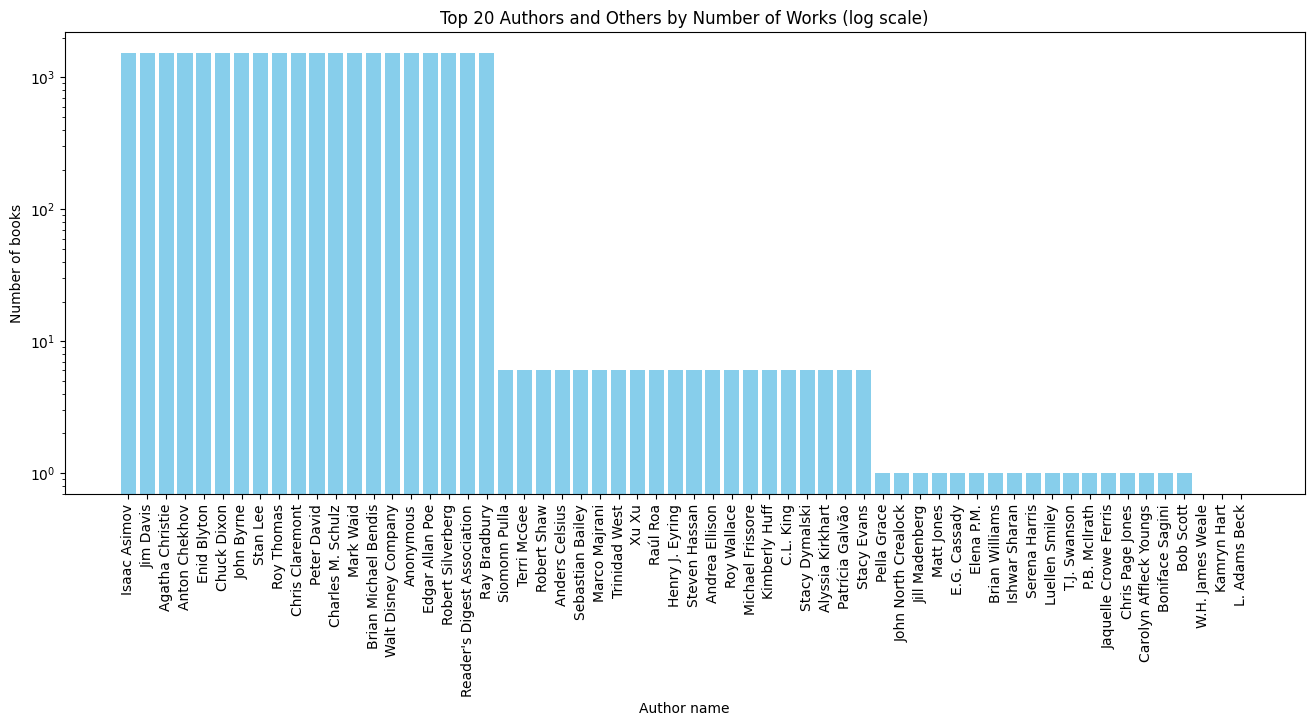

In [72]:
books_for_authors = df_a.groupby(["id"])[["works_count","id","name"]].agg('sum').sort_values( by="works_count",ascending=False)

N = 20
middle = len(books_for_authors.values)//2
#top N authors and the rest
top_authors = books_for_authors.head(N)
middle_authors = books_for_authors.iloc[middle:middle+20]
other_authors = books_for_authors.tail(20)

# Evaluate the mean number of books of the "Others" authors
other_books_count = other_authors['works_count']

others_df = pd.DataFrame({'name': ["Others' average"], 'works_count': [other_books_count]})
combined_df = pd.concat([top_authors,middle_authors, other_authors], ignore_index=True)

plt.figure(figsize=(16, 6))
plt.bar(combined_df['name'], combined_df['works_count'], color='skyblue')
plt.xlabel('Author name')
plt.ylabel('Number of books')
plt.title('Top {0} Authors and Others by Number of Works (log scale)'.format(N))
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**COMMENT**
We showed just the first 20 authors who wrote the higher number of books, the 20 authors in the half of the group who wrote more books and the last 20 authors for number of books written.\
What we can observe from this plot bar, is that the author who worked on more books is Isaac Asimov with about 1600 books. The first two groups of our population are quite homogeneus for number of books; while the third one, the one with the lower number of books, has a difference of just one book: in fact the last three authors, W.H. James Weale, Kamryn Hart and L. Adams Beck, have a count of 0 works. 

**Which book has the highest number of reviews?**

In [73]:
book_most_rev = df_b.sort_values(by= "text_reviews_count", ascending=False).head(1)
book_title = book_most_rev.title.values[0]
book_author = book_most_rev.author_name.values[0]
revs = book_most_rev.text_reviews_count.values[0]
print("The book titled {0}, by {1}, has the highest number of reviews: {2} reviews".format(book_title, book_author, revs))

The book titled Arena smrti (Igre lakote #1), by Suzanne Collins, has the highest number of reviews: 174518 reviews


**Result:** The book titled Arena smrti (Igre lakote #1), by Suzanne Collins, has the highest number of reviews: 174518 reviews

**Which are the top ten and ten worst books concerning the average score?**


In [74]:
top_ten = df_b.sort_values(by= "average_rating", ascending=False).head(10)

top = {'title':[top_ten.values[i][1] for i in range(len(top_ten.values))], 'author':[top_ten.values[i][2] for i in range(len(top_ten.values))],
       'rating': [top_ten.values[i][6] for i in range(len(top_ten.values))] }

df_top = pd.DataFrame(top)
df_top

,title,author,rating
0,Espiritualidade,Doutor Luis Alexandre Ribeiro Branco,5.0
1,Savage Summer,Lucas McWilliams,5.0
2,Beacon: Part V,Jonathan C. Gillespie,5.0
3,Կանչ,Sos Sargsyan,5.0
4,Վարագույրից այս կողմ,Sos Sargsyan,5.0
5,New Testament,Anonymous,5.0
6,Perry Rhodan 2648: Die Seele der Flotte,Christian Montillon,5.0
7,Nueva Enciclopedia Larousse (Atlas),Anonymous,5.0
8,The Open Door & The Present Testimony,Watchman Nee,5.0
9,Aban's Accension,Shireen Jeejeebhoy,5.0


In [7]:
worst_ten = df_b.sort_values(by= "average_rating", ascending=True).head(10)

worst = {'title': [worst_ten.values[i][1] for i in range(len(worst_ten.values))], 'author': [worst_ten.values[i][2] for i in range(len(worst_ten.values))],
         'rating': [worst_ten.values[i][6] for i in range(len(worst_ten.values))] }

df_worst = pd.DataFrame(worst)
df_worst

,title,author,rating
0,Dolazak iz ljeta,Čedo Prica,0.0
1,"Kak Yong, The Daun & Gifts",Kusyi Hirdan,0.0
2,The Framed World (New Directions In Tourism An...,Mike Robinson,0.0
3,What Is an Establishment of Religion? (Antidis...,Michael J. Findley,0.0
4,Vanad varjud,Andrejs Upīts,0.0
5,Alli Di Weld?,Richard Powell,0.0
6,What Is Secular Humanism? (Antidisestablishmen...,Michael J. Findley,0.0
7,In the Thick of Things (Thick 3),Nah'Sun,0.0
8,1990s: Electronic Media (20th Century Media),Steve Parker,0.0
9,1900-20: Sound And Light (20th Century Media),Steve Parker,0.0


**Explore the different languages in the book’s dataset, providing a proper chart
summarizing how these languages are distributed throughout our virtual library**

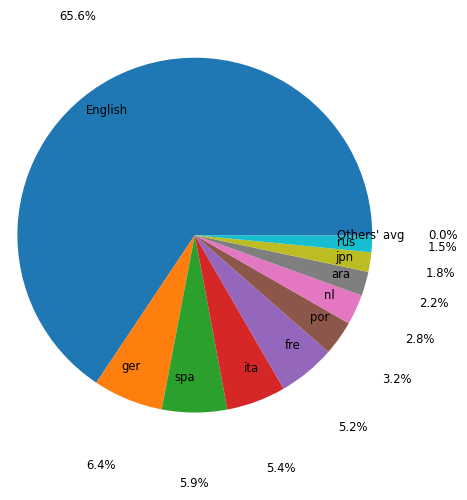

In [4]:
df_b['language'] = df_b['language'].replace({'eng': 'English', 'en-US': 'English', 'en-GB': 'English'}) #grouping the three different lables for english  

lang = df_b.groupby(['language'])[['language']].size().reset_index(name='count').sort_values( by="count",ascending=False)

N=10 
topten = lang.head(10)
others = lang.iloc[10:]

others_mean = others['count'].mean()

# Create a DataFrame for "Others"
others_df = pd.DataFrame({'language': ["Others' avg"], 'count': [others_mean]})

# Concatenate the DataFrames
combined_df = pd.concat([topten, others_df], ignore_index=True)

combined_df['count'] = combined_df['count'].apply(lambda x: x/(sum(combined_df['count'].values))) # normalized values

# Create a pie chart
labels= combined_df['language'].values
sizes = combined_df['count'].values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.4, labeldistance=.8, textprops={'size':'smaller'},radius=1.2)
plt.show()

**COMMENT**
First of all we noticed that there were three different lables to indicate the english language, so we grouped them under the same cathegory of 'English'.\
English is the most used language in our dataset, in fact we can see that the majoirty of the books are in english. The second most used language is the german one, but is evident that it is used more o less just as much as the other minority's languages.

**How many books have more than 250 pages?**


In [76]:

books = df_b[df_b['num_pages'] > 250].groupby(['num_pages'])[['num_pages']].size().reset_index(name='count')
num_books = sum(books['count'].values)
print("There are {0} books with more than 250 pages.".format(num_books))

There are 498311 books with more than 250 pages.


**result:** There are 498311 books with more than 250 pages.

**Plot the distribution of the fans count for the 50 most prolific authors (the ones
who have written more books).**

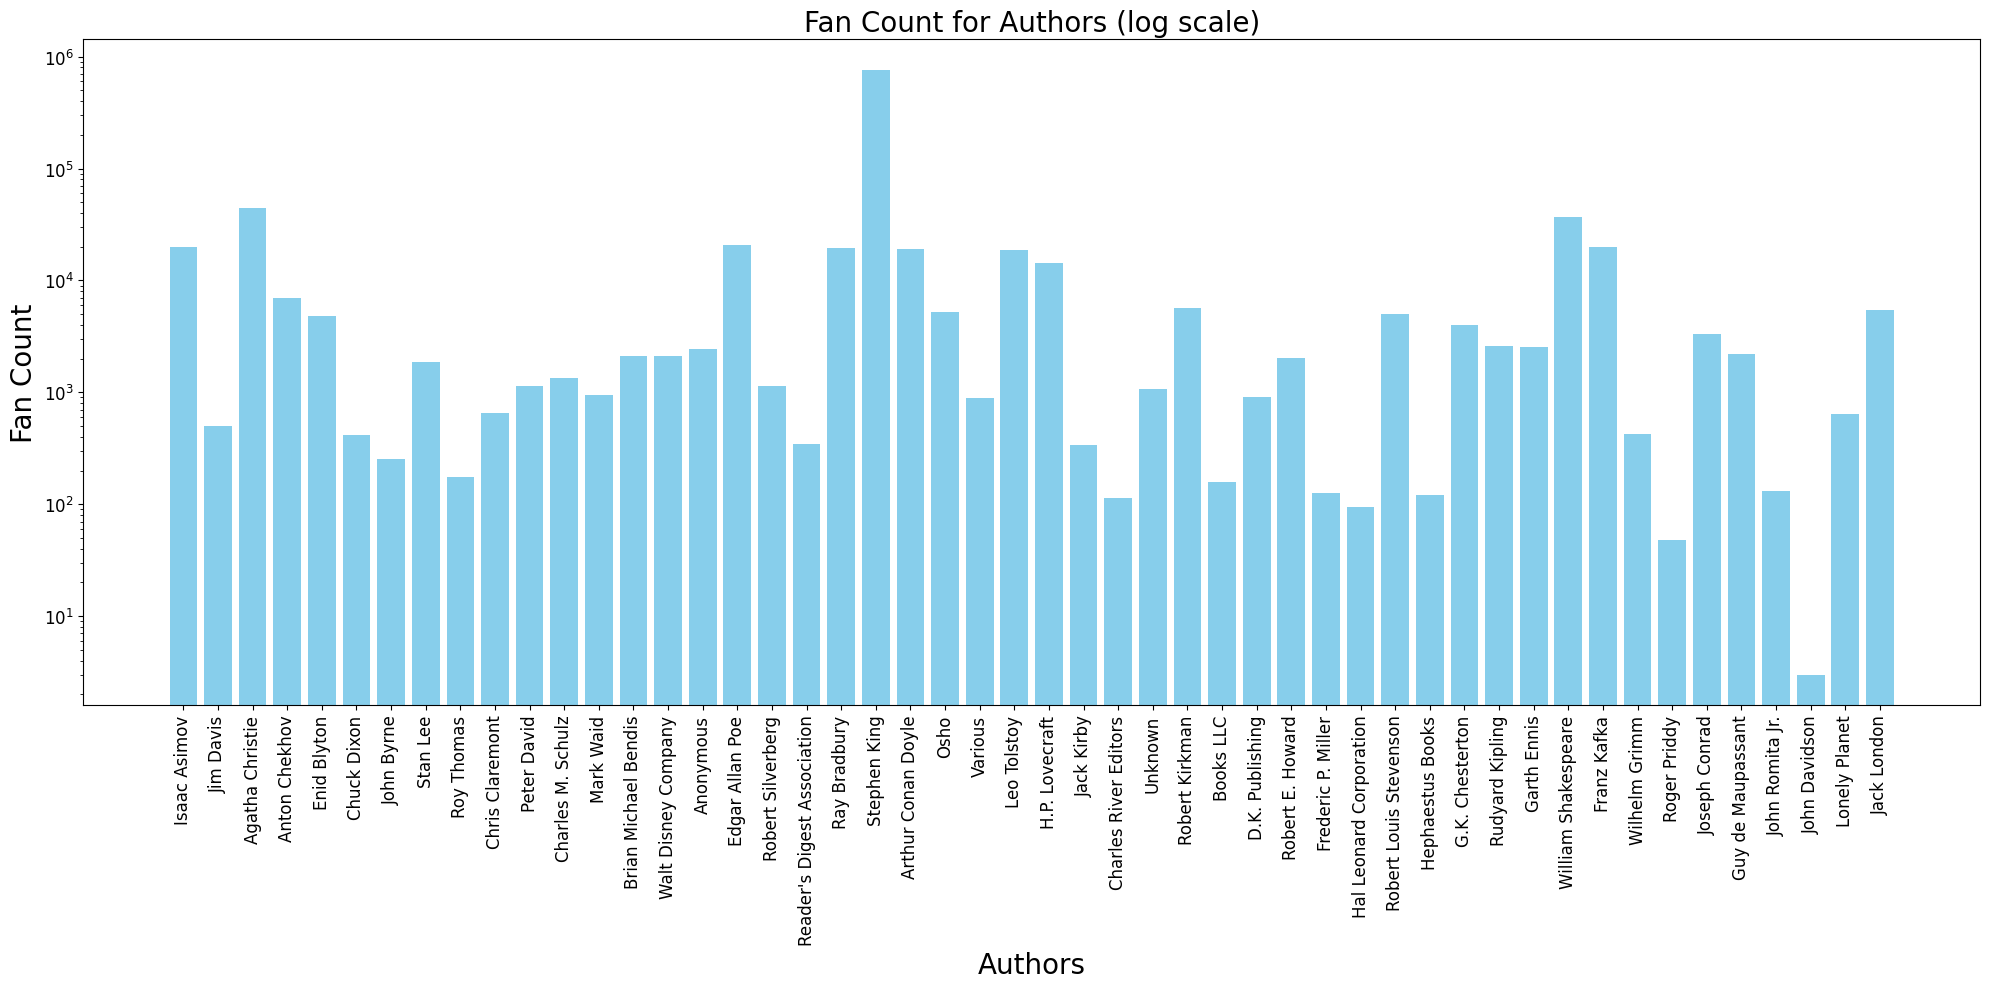

In [77]:
books_for_authors = df_a.groupby(["id"])[["fans_count","works_count","name"]].agg('sum').sort_values( by="works_count",ascending=False).head(50)

authors = books_for_authors["name"]
fan_counts = books_for_authors["fans_count"]

plt.figure(figsize=(20, 10))
plt.bar(authors, fan_counts, color='skyblue')
plt.xlabel('Authors',fontsize = 20)
plt.ylabel('Fan Count',fontsize = 20)
plt.title('Fan Count for Authors (log scale)',fontsize = 20)
plt.xticks(rotation=90, fontsize = 12) 
plt.yticks(fontsize=12)
plt.yscale('log')
plt.tight_layout()
plt.show()

As a result of the analysis, pop up authors labeled as 'Unknown', 'Various' and 'Anonymus'. Those values do not apport a significant result, but can not be deleted since represent a significant amount of data.  

## 3.[RQ3]

**Write a function that takes as input a year and returns as output the following information:**
- The number of books published that year
- The total number of pages written that year.
- The most prolific month of that year.
- The longest book written that year. 

We assume the books of different editions are considered as a different book in respect to the original, since they all are distint books, published in the specified year.  

In [80]:
months = {'01':'January', '02':'February', '03': 'March', '04':'April', '05': 'May', '06':'June',
           '07': 'July', '08': 'August', '09':'September', '10':'October', '11': 'November', '12':'December'}

Defining my function for creating the requested dataframe, exploiting the previous clening we performed on the dataframe.

In [81]:
def func_year(df, year):

    df_row = df[df['pub_year']==year]

    # number of books published in the year
    num_books_per_year = df_row.groupby(['id'])[['id', 'title','author_name']].agg('sum')
    books_in_year = len(num_books_per_year['id'].values)

    # number of pages published in the year
    num_pages_per_year = df_row.groupby(['id'])[['id', 'title','author_name','num_pages']].agg('sum').sort_values(by= 'num_pages',ascending=False )
    pages_in_year = sum(num_pages_per_year['num_pages'].values)
    
    # the longest book written in the year
    longest_book = num_pages_per_year.title.values[0]
    
    # the most prolific month of the year (the month with more books)
    num_books_per_month = df_row.groupby(['pub_month'])[['id']].agg(tot_books=pd.NamedAgg(column='id', aggfunc='count')).sort_values(by= 'tot_books',ascending=False )  
    prolific_month = months[num_books_per_month.index[0]]
    
    return books_in_year, pages_in_year, longest_book, prolific_month
    

**Creating our data frame via the function we defined**

In [82]:
# creating my data frame for each year
years = list(set(df_b.pub_year.values))

d = {'key': years, 'Number of Books':[], 'Pages': [], 'Longest Book':[], 'Prolific month':[]}

for year in years:
    a, b, c, e = func_year(df_b, year)
    d['Number of Books'].append(a)
    d['Pages'].append(b)
    d['Longest Book'].append(c)
    d['Prolific month'].append(e)

my_df = pd.DataFrame(d, index=d['key']).sort_values(by='key', ascending=True)
my_df

,key,Number of Books,Pages,Longest Book,Prolific month
100.0,100.0,2,295.0,Βίοι Παράλληλοι: Λυκούργος - Νουμάς,January
103.0,103.0,1,284.0,Bernard Ward,January
104.0,104.0,5,2423.0,Lügat-ı Manzum (Tuhfe-i Lami'i),January
105.0,105.0,1,186.0,Anders Zorn: Unveiled,March
107.0,107.0,1,107.0,لغز عين السمكة,January
...,...,...,...,...,...
2019.0,2019.0,94,27306.0,Hopeless / Losing Hope / Finding Cinderella,August
2020.0,2020.0,59,20801.0,"The Complete Ripley Novels (Ripley, #1-5)",February
2021.0,2021.0,15,7512.0,The Navigator's Children (The Last King of Ost...,August
2022.0,2022.0,4,1280.0,Highland Ever After (The Montgomerys and Armst...,October


Show the result for the head and tail of our data frame considering the first and last 10 years

In [83]:
my_df.head(10)

,key,Number of Books,Pages,Longest Book,Prolific month
100.0,100.0,2,295.0,Βίοι Παράλληλοι: Λυκούργος - Νουμάς,January
103.0,103.0,1,284.0,Bernard Ward,January
104.0,104.0,5,2423.0,Lügat-ı Manzum (Tuhfe-i Lami'i),January
105.0,105.0,1,186.0,Anders Zorn: Unveiled,March
107.0,107.0,1,107.0,لغز عين السمكة,January
108.0,108.0,2,2089.0,Kouwe kermis,January
110.0,110.0,2,220.0,Breath of India: 4 Friends On a Spiritual Pilg...,August
120.0,120.0,1,337.0,"Vite parallele: Nicia, Crasso",January
124.0,124.0,1,124.0,Mẹ: biểu hiện của tình thương,January
125.0,125.0,1,1977.0,Begin and Co. as They Really are: An Anthology,January


In [84]:
my_df.tail(10)

,key,Number of Books,Pages,Longest Book,Prolific month
2014.0,2014.0,96981,23536699.0,"A Most Unlikely Countess (To Love a Wildcat, #2)",January
2015.0,2015.0,32824,8495695.0,Revel for the American Nation: A History of th...,January
2016.0,2016.0,1470,483385.0,Homestuck,January
2017.0,2017.0,365,117384.0,The Starfarers Quartet,February
2018.0,2018.0,148,58756.0,地海六部曲,March
2019.0,2019.0,94,27306.0,Hopeless / Losing Hope / Finding Cinderella,August
2020.0,2020.0,59,20801.0,"The Complete Ripley Novels (Ripley, #1-5)",February
2021.0,2021.0,15,7512.0,The Navigator's Children (The Last King of Ost...,August
2022.0,2022.0,4,1280.0,Highland Ever After (The Montgomerys and Armst...,October
2023.0,2023.0,1,463.0,Apocalypse,September


**ChatGPT implementation**\
We asked chatGPT the following question: I want to create a function in python that takes in input a dataframe and a year, and returns: the  number of books published that year, the total number of pages written that year, the month where the most books have been published that year and the longhest book written that year. the dataframe in input has these columns:['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'ratings_count', 'publication_date', 'original_publication_date', 'edition_information', 'num_pages']. Then create a data frame out of this function, for every year in the original data frame up until 2023. \
\
The following was its answer:

In [16]:

def analyze_books_by_year(dataframe, year):
    # Filter out rows with invalid publication_date values
    valid_rows = dataframe['original_publication_date'].apply(lambda x: str(x).isdigit())
    year_df = dataframe[valid_rows]

    # Convert years to integers
    year_df['publication_year'] = year_df['original_publication_date'].astype(int)
    year_df = year_df[year_df['publication_year'] == year]

    num_books_published = year_df.shape[0]
    total_pages_written = year_df['num_pages'].sum()

    # Find the month with the most books published
    if not year_df.empty:
        year_df['original_publication_date'] = pd.to_datetime(year_df['publication_year'], format='%Y')
        most_books_month = year_df['original_publication_date'].dt.month.value_counts().idxmax()
    else:
        most_books_month = None

    # Find the longest book written
    longest_book = year_df['num_pages'].idxmax()
    longest_book_title = year_df.loc[longest_book, 'title']

    return {
        'Year': year,
        'Number of Books Published': num_books_published,
        'Total Pages Written': total_pages_written,
        'Month with Most Books Published': most_books_month,
        'Longest Book Title': longest_book_title
    }

# Create an empty list to store DataFrames for each year
result_dfs = []

# Get the minimum and maximum years in the DataFrame
min_year = df_b['original_publication_date'].min()
max_year = 2023

# Loop through each year and create DataFrames
for year in range(int(min_year), max_year + 1):
    result = analyze_books_by_year(df_b, year)
    result_dfs.append(result)

# Convert the list of dictionaries into a DataFrame
final_result_df = pd.DataFrame(result_dfs)

# Set the 'Year' column as the index
final_result_df.set_index('Year', inplace=True)

# Print the resulting DataFrame
print(final_result_df)

ValueError: invalid literal for int() with base 10: '100-01-01'

Although we tried multiple times to adjust the code, trying to explain to the chat tool the errors it arised and the structure of the values inside the pubblication data, it seems not to understand how to solve the problem.\
This leads to the conclusio that, for highly-structured problems, where the disomogenity of data rules, an AI tool do not perform as a human would to solve the problem. 

## 4.[RQ4]

**Be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?**

In [85]:
epo = df_a.groupby(['name']).agg(names_occurency=pd.NamedAgg(column='name', aggfunc='count')).sort_values(by= 'names_occurency',ascending=False ) 
n = epo[epo.names_occurency >1] 

lista_nomi = n.index
indici_nomi = df_a[df_a['name'].apply(lambda x: x in lista_nomi)].index

nome_id = df_a.loc[indici_nomi].apply(lambda row: (row['name'], row['id']), axis=1).values
eponym = [] # the list contains the names of authors with same name but different id 
d = {} # the dictionary is needed to check which id corresponds to a name and vice versa
for nome, id in nome_id:
    if nome in d.keys():
        if id != d[nome]:
            eponym.append(nome)
    else:
        d[nome] = id

print('There are {0} authors that are eponymous'.format(len(eponym)))

There are 21714 authors that are eponymous


No, it's not true, there are authors that have the same name but different id.

**Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.**

In order to do that, we created a function that takes in input not only the list of autor's ids, but has to be given also the dataframe it is going to work on , the name of the column where the id is stored and the name of the column where the titles are stored.

In [86]:
def dictionary_for_authors(df, col_id, col_title,  list_of_auth):
    res = {}
    for auth in list_of_auth:
        res[auth] = list(df[df[col_id]==auth][col_title].values)
    return res

In [87]:
# prova, DA CANCELLARE POI QUESTA CELLA

input_list= df_a.id.values[:20]
#merged_df = df_a.merge(df_b, how='inner', left_on='id', right_on='author_id')

print(dictionary_for_authors(df=df_b, col_id='author_id', col_title='title', list_of_auth=input_list))

{4: ["The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)", "The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy, #1-5)", "The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1-5)", "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)", "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)", "The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy, #1-5)", 'The Long Dark Tea-Time of the Soul (Dirk Gently, #2)', 'The Salmon of Doubt (Dirk Gently, #3)', "Mostly Harmless (Hitchhiker's Guide to the Galaxy, #5)", "Life, the Universe and Everything (Hitchhiker's Guide, #3)", "Dirk Gently's Holistic Detective Agency (Dirk Gently, #1)", 'Salmon of Doubt: Hitchhiking the Galaxy One Last Time', "Dirk Gently's Holistic Detective Agency (Dirk Gently #1)", "Life, the Universe and Everything (Hitchhiker's Guide to the Galaxy, #3)", "The Rest

**What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?**

In [88]:
def find_longest_title(lista):

    longest = ''
    for el in lista: 
        for libro in el:       
            if len(libro) > len(longest):
                longest = libro
    return longest

In [89]:
top_20_auth = df_a.groupby(['id'])[['id','average_rating']].agg('sum').sort_values(by= 'average_rating', ascending= False).head(20)

d_20 = dictionary_for_authors(df=df_b, col_id='author_id', col_title='title', list_of_auth = top_20_auth['id'].values)
longest = find_longest_title(d_20.values())
print("'{0}' is the longest book title among the top 20 authors for their average rating".format(longest))

longer_overall = df_b[df_b['title'].str.len() > len(longest)]

if longer_overall.empty :
    print("'{0}' is the longest book overall".format(longest))
else:
    print("'{0}' is not the longest book overall".format(longest))

'Stories from Hadraemscapen (Birth of a New Dawn #1, A Time of Hope #2, Darkness Settles #3)' is the longest book title among the top 20 authors for their average rating
'Stories from Hadraemscapen (Birth of a New Dawn #1, A Time of Hope #2, Darkness Settles #3)' is not the longest book overall


**What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer**

In [90]:
shortest_books = df_b[df_b['title'].str.len() ==1 ]
shortest_books

,id,title,author_name,author_id,work_id,language,average_rating,ratings_count,text_reviews_count,publication_date,original_publication_date,num_pages,pub_year,pub_month
196707,399780,K,Daniel Easterman,71071,389214,fre,3.63,128,12,2000-03-02,1997-01-01,500.0,1997.0,01
390233,881099,V,Thomas Pynchon,235,2999000,English,3.96,19113,1041,,1963-08-01,492.0,1963.0,08
391584,884001,M,Anton Kaes,375543,869272,English,3.95,86,8,2000-02-26,2000-02-26,96.0,2000.0,02
1159373,3334380,K,Daniel Easterman,71071,389214,fre,3.63,128,12,2006-12-07,1997-01-01,499.0,1997.0,01
1400086,4912955,٧,Ghazi A. Algosaibi,14053959,4978497,ara,3.84,2023,271,2003,1998-02-01,336.0,1998.0,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950925,25421142,X,J.J. Connolly,17914123,29877,fre,3.99,1519,105,2015-04-09,2000-04-06,439.0,2000.0,04
6950927,25421147,X,J.J. Connolly,17914123,29877,fre,3.99,1519,105,2015-04-09,2000-04-06,439.0,2000.0,04
6960610,25446783,X,Ilyasah Shabazz,363368,41679264,English,3.89,2658,605,2015,2015-01-06,385.0,2015.0,01
6975090,25484953,C,Tom McCarthy,30757,9540419,tur,3.16,3324,504,2015-05,2010-08-05,445.0,2010.0,08


We can't  really say which book is the shortest, since there are many with the same number of charachters; but we can notice that there are books with only one letter as theit title.\
In order to provide a meaningfull answer, we checked if those books actually existed, and the answer is positive; So we can state that there is more than just one book with a single letter as its title, and for this reason we can't provide a uniqe answer.\
What we can provide, though, are all the shortest books: all the ones that have one characther in their name.

## 8.[RQ8]

**Can you demonstrate that readers usually rate the longest books as the worst?**

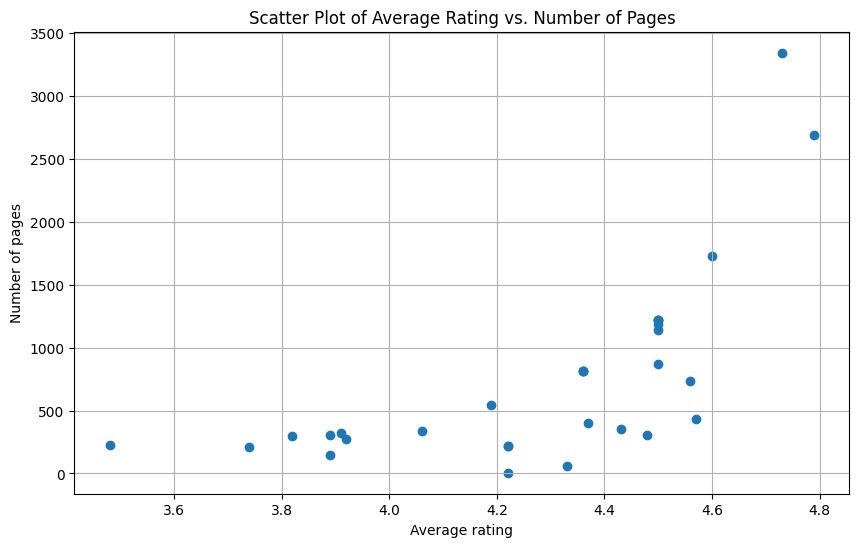

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(df_b['average_rating'], df_b['num_pages'])
plt.xlabel('Average rating')
plt.ylabel('Number of pages')
plt.title('Scatter Plot of Average Rating vs. Number of Pages')
plt.grid(True)
plt.show()


In order to demonstrate the hypothesis we exploited a scatter plot, that will locate each couple (average_rating, num_pages) of the dataframe df_b in a bidimensional space; Here we can see there is a growing trend of the number of pages for the increasing of the rating average. 
Although there are many other reasons that may cause a bad or good review, we found a direct positive correlation between the two feautures. 

**Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?**

A proper statistical procedure to compare the average rating of english and non-english books is a two-Sample t-test: our hypothesis that we want to demonstrate is  

In [15]:
# created a partition of the space, labeling all the other languages as 'non English'
to_replace = list(set(df_b[df_b['language']!='English']['language'].dropna().values))
subset = df_b.loc[:,['language', 'average_rating']].dropna()

subset['language'] = subset['language'].replace(to_replace=to_replace, value='non English')
subset['boolean_language'] = subset['language'].apply(lambda x: 1 if x == 'English' else 0)
subset

,language,average_rating,boolean_language
0,English,4.50,1
1,English,4.48,1
2,English,4.43,1
3,English,4.57,1
4,English,4.56,1
...,...,...,...
6988836,non English,4.00,0
6988837,non English,3.08,0
6988838,English,3.85,1
6988839,non English,3.66,0


In [36]:
# plot the distribution of the mean average rating for both kind of language
# to explain what is my starting hypothesis

e = (subset[subset['language']=='English']['average_rating']).mean()
n = (subset[subset['language']=='non English']['average_rating']).mean()
print('average rating mean of the english books:',e)
print('average rating mean of the non-english books:',n)
e_v = (subset[subset['language']=='English']['average_rating']).var()
n_v = (subset[subset['language']=='non English']['average_rating']).var()
print('variance english:', e_v)
print('variance of non english:', n_v)


average rating mean of the english books: 3.7091895731917393
average rating mean of the non-english books: 3.665797547230062
variance english: 0.8937895772241686
variance of non english: 0.8442040007531174


In [37]:
from scipy import stats

english_ratings = subset[subset['boolean_language']==1]
non_english_ratings= subset[subset['boolean_language'] == 0]

t_stat, p_value = stats.ttest_ind(english_ratings['average_rating'], non_english_ratings['average_rating'], equal_var=True)
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in average ratings.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in average ratings.")
print('p-value:', p_value)


Reject the null hypothesis: There is a statistically significant difference in average ratings.
p-value: 0.0


**COMMENT**


**About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.**

In [38]:
english_ratings = subset[subset['boolean_language']==1]
non_english_ratings= subset[subset['boolean_language'] == 0]

# mode
eng_mode = english_ratings.mode()
non_eng_mode = non_english_ratings.mode()

#mean
eng_mean = english_ratings.mean()
non_eng_mean = non_english_ratings.mean()

#median
eng_median = english_ratings.quantile(0.5)
non_eng_median = non_english_ratings.quantile(0.5)

#quantiles
eng_first_q = english_ratings.quantile(0.25)
non_eng_first_q = non_english_ratings.quantile(0.25)
eng_third_q = english_ratings.quantile(0.75)
non_eng_third_q = non_english_ratings.quantile(0.75)





A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers

# Command Line Question (CLQ)

# AWS Question (AWSQ)

# Algorithmic Question (AQ)